In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

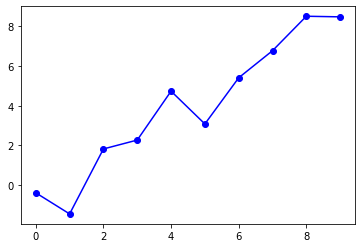

In [5]:
data = {
    'x' : np.arange(10),
    'y' : np.arange (10) + np.random.randn(10),
}

df = pd.DataFrame (data)
plt.plot (df['x'],df['y'],'b-o')

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

## with all data

In [7]:
model.fit(df[['x']],df['y'])
print ( 'slope m =',model.coef_)
print('intercept c =', model.intercept_)

slope m = [1.10234974]
intercept c = -1.0388119009375503


# OLS : ORDINARY LEAST SQUARE / LINEAR REGRESSION

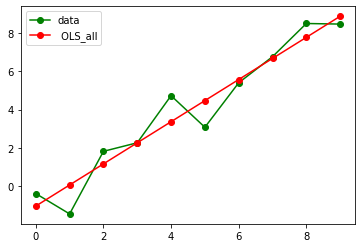

In [19]:
df['y_pred'] = model.predict(df[['x']])

# OLS

plt.plot (df['x'],df['y'],'g-o')
plt.plot (df['x'],df['y_pred'],'r-o')
plt.legend (['data',' OLS_all'])

## Linear Regression, train 80% random data

In [12]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test = train_test_split(df[['x']],df['y'], test_size =0.2)

print (x_test)
print(y_test)

   x
4  4
1  1
4    4.731050
1   -1.448936
Name: y, dtype: float64


In [22]:
model.fit(train_x,train_y)
df['y"80'] = model.predict(df[['x']])

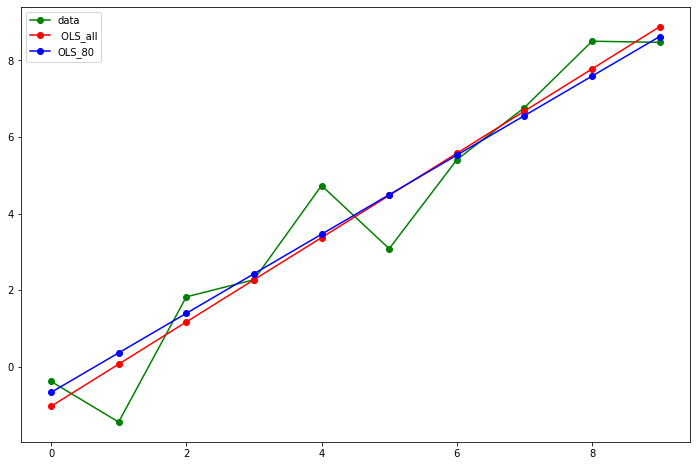

In [26]:
plt.figure(figsize=(12,8))
plt.plot (df['x'],df['y'],'g-o')
plt.plot (df['x'],df['y_pred'],'r-o')
plt.plot (df['x'],df['y"80'],'b-o')

plt.legend (['data',' OLS_all','OLS_80'])

## Linear Regression , train 2 data

In [24]:
model.fit(df[['x']].iloc[:2],df['y'].iloc[:2])

# prediksi dengan 2 data pertama
df['y"2'] = model.predict(df[['x']])


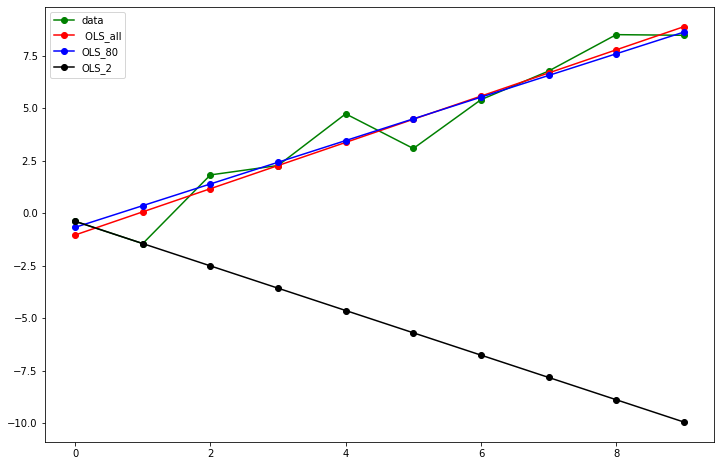

In [27]:
plt.figure(figsize=(12,8))
plt.plot (df['x'],df['y'],'g-o')
plt.plot (df['x'],df['y_pred'],'r-o')
plt.plot (df['x'],df['y"80'],'b-o')
plt.plot (df['x'],df['y"2'],'k-o')
plt.legend (['data',' OLS_all','OLS_80','OLS_2'])

## Plot residual : selisih antara y dengan y_

In [29]:
import seaborn as sb

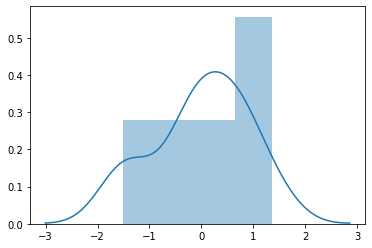

In [34]:
sb.distplot((df['y']-df['y_pred']))

## Ridge Regression

Sum Square Error $ = \sum (y - \hat{y}) ^ 2 $

$ SSE = SSE \quad OLS + \lambda \times m^2 $


In [35]:
from sklearn.linear_model import Ridge

In [41]:
modelR = Ridge(alpha=0)  # kalau nilai alpha 0 maka hasilnya akan sama dengan OLS biasa (2 data)

## fitting dengan 2 data pertama

modelR.fit(df[['x']].iloc[:2],df['y'].iloc[:2])

# prediksi dengan 2 data pertama
df['y"2ridge'] = modelR.predict(df[['x']])
df

,x,y,y_pred,"y""80","y""2","y""2ridge"
0,0,-0.386493,-1.038812,-0.674999,-0.386493,-0.386493
1,1,-1.448936,0.063538,0.358388,-1.448936,-1.448936
2,2,1.821947,1.165888,1.391776,-2.511379,-2.511379
3,3,2.269800,2.268237,2.425163,-3.573822,-3.573822
4,4,4.731050,3.370587,3.458551,-4.636265,-4.636265
5,5,3.080415,4.472937,4.491938,-5.698707,-5.698707
6,6,5.404822,5.575287,5.525326,-6.761150,-6.761150
7,7,6.769123,6.677636,6.558713,-7.823593,-7.823593
8,8,8.503314,7.779986,7.592101,-8.886036,-8.886036
9,9,8.472579,8.882336,8.625488,-9.948479,-9.948479


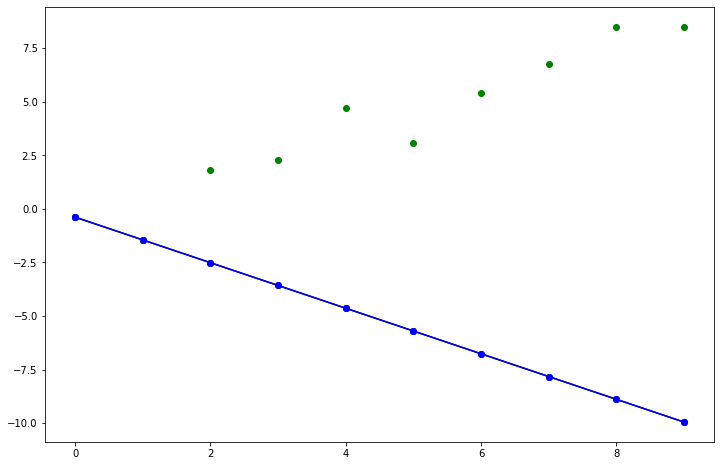

In [42]:
plt.figure(figsize=(12,8))
plt.plot (df['x'],df['y'],'go')
plt.plot (df['x'],df['y"2'],'k-o')
plt.plot (df['x'],df['y"2ridge'],'b-o')


### Dari gambar diatas dapat disimpulkan : jika nilai alpha 0 maka hasil dari y utntuk 2 data pertama (y"2) 
### akan sama dengan y ridge (y"2ridge) sehingga plot dari kedua fungsi tersebut akan tumpang tindih

In [39]:
modelR = Ridge(alpha= -0.47)  # kalau nilai alpha 0 maka hasilnya akan sama dengan OLS biasa (2 data)

## fitting dengan 2 data pertama

modelR.fit(df[['x']].iloc[:2],df['y'].iloc[:2])

# prediksi dengan 2 data pertama
df['y"2ridge'] = modelR.predict(df[['x']])
df

,x,y,y_pred,"y""80","y""2","y""2ridge"
0,0,-0.386493,-1.038812,-0.674999,-0.386493,7.935976
1,1,-1.448936,0.063538,0.358388,-1.448936,-9.771405
2,2,1.821947,1.165888,1.391776,-2.511379,-27.478785
3,3,2.269800,2.268237,2.425163,-3.573822,-45.186166
4,4,4.731050,3.370587,3.458551,-4.636265,-62.893547
5,5,3.080415,4.472937,4.491938,-5.698707,-80.600927
6,6,5.404822,5.575287,5.525326,-6.761150,-98.308308
7,7,6.769123,6.677636,6.558713,-7.823593,-116.015688
8,8,8.503314,7.779986,7.592101,-8.886036,-133.723069
9,9,8.472579,8.882336,8.625488,-9.948479,-151.430449


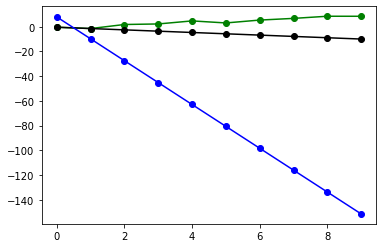

In [40]:
plt.plot (df['x'],df['y'],'g-o')
plt.plot (df['x'],df['y"2'],'k-o')
plt.plot (df['x'],df['y"2ridge'],'b-o')

## LASSO Regression
- LASSO ( Least Absolute Shrinkage and selection operator)

Sum Square Error OLS $ = \sum (y - \hat{y}| $

SSE LASSO = SSE OLS $ + \lambda . |m|  $

nilai penalty L1 Regularization $ + \lambda . |m| $


In [43]:
from sklearn.linear_model import Lasso

In [44]:
modelL = Lasso(alpha=0)  # kalau nilai alpha 0 maka hasilnya akan sama dengan OLS biasa (2 data)

## fitting dengan 2 data pertama

modelL.fit(df[['x']].iloc[:2],df['y'].iloc[:2])

# prediksi dengan 2 data pertama
df['y"2lasso'] = modelL.predict(df[['x']])
df

C:\Users\X220\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """
C:\Users\X220\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)


,x,y,y_pred,"y""80","y""2","y""2ridge","y""2lasso"
0,0,-0.386493,-1.038812,-0.674999,-0.386493,-0.386493,-0.386493
1,1,-1.448936,0.063538,0.358388,-1.448936,-1.448936,-1.448936
2,2,1.821947,1.165888,1.391776,-2.511379,-2.511379,-2.511379
3,3,2.269800,2.268237,2.425163,-3.573822,-3.573822,-3.573822
4,4,4.731050,3.370587,3.458551,-4.636265,-4.636265,-4.636265
5,5,3.080415,4.472937,4.491938,-5.698707,-5.698707,-5.698707
6,6,5.404822,5.575287,5.525326,-6.761150,-6.761150,-6.761150
7,7,6.769123,6.677636,6.558713,-7.823593,-7.823593,-7.823593
8,8,8.503314,7.779986,7.592101,-8.886036,-8.886036,-8.886036
9,9,8.472579,8.882336,8.625488,-9.948479,-9.948479,-9.948479


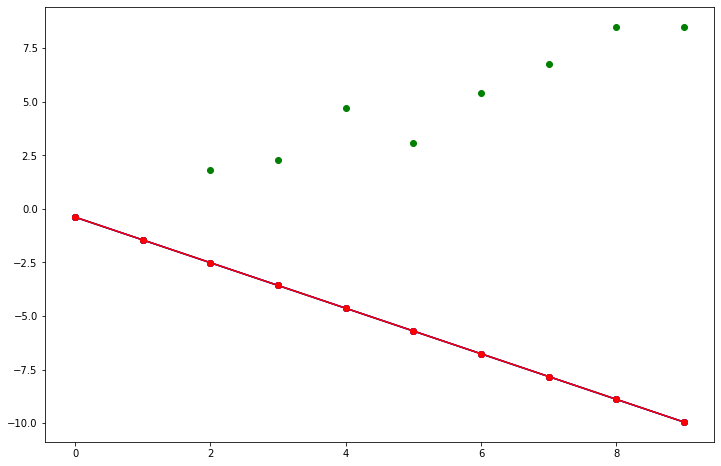

In [46]:
plt.figure(figsize=(12,8))
plt.plot (df['x'],df['y'],'go')
plt.plot (df['x'],df['y"2'],'k-o')
plt.plot (df['x'],df['y"2ridge'],'b-o')
plt.plot (df['x'],df['y"2lasso'],'r-o')



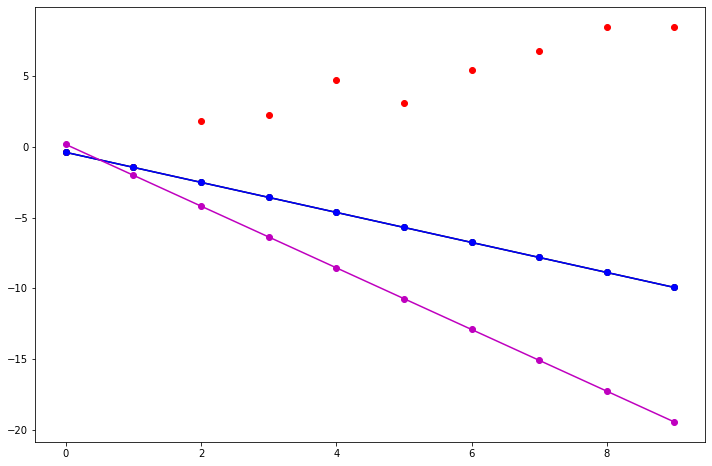

In [49]:
modelL = Lasso(alpha=-0.28)  # kalau nilai alpha 0 maka hasilnya akan sama dengan OLS biasa (2 data)

## fitting dengan 2 data pertama

modelL.fit(df[['x']].iloc[:2],df['y'].iloc[:2])

# prediksi dengan 2 data pertama
df['y"2lasso'] = modelL.predict(df[['x']])
# df

plt.figure(figsize=(12,8))
plt.plot (df['x'],df['y'],'ro')
plt.plot (df['x'],df['y"2'],'k-o')
plt.plot (df['x'],df['y"2ridge'],'b-o')
plt.plot (df['x'],df['y"2lasso'],'m-o')



## Evaluation Metrics

In [50]:
from sklearn.metrics import mean_squared_error

print ( 'RMSE OLS_2', np.sqrt( mean_squared_error(df['y'],df['y"2'])))

print ( 'RMSE RIDGE_2', np.sqrt( mean_squared_error(df['y'],df['y"2ridge'])))

print ( 'RMSE LASSO_2', np.sqrt( mean_squared_error(df['y'],df['y"2lasso'])))

RMSE OLS_2 11.047299502797078
RMSE RIDGE_2 11.047299502797078
RMSE LASSO_2 16.55013759185131


## Elastic-Net Regression



Sum Squared Error OLS $ = \sum |y - \hat{y}| $

SSE Elastic-Net = SSE OLS $\displaystyle + \lambda_{ridge} . m^2 + \lambda_{lasso} . |m|  $

nilai penalty L1+L2 Regularization 
$\displaystyle + \lambda_{ridge} . m^2 + \lambda_{lasso} . |m| $


In [55]:
from sklearn.linear_model import ElasticNet

In [62]:
modelE = ElasticNet(alpha=0)  # kalau nilai alpha 0 maka hasilnya akan sama dengan OLS biasa (2 data)

## fitting dengan 2 data pertama

modelE.fit(df[['x']].iloc[:2],df['y'].iloc[:2])

# prediksi dengan 2 data pertama
df['y"2elastic'] = modelE.predict(df[['x']])
df

C:\Users\X220\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """
C:\Users\X220\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)


,x,y,y_pred,"y""80","y""2","y""2ridge","y""2lasso","y""elastic","y""2elastic"
0,0,-0.386493,-1.038812,-0.674999,-0.386493,-0.386493,0.173507,-0.917715,-0.386493
1,1,-1.448936,0.063538,0.358388,-1.448936,-1.448936,-2.008936,-0.917715,-1.448936
2,2,1.821947,1.165888,1.391776,-2.511379,-2.511379,-4.191379,-0.917715,-2.511379
3,3,2.269800,2.268237,2.425163,-3.573822,-3.573822,-6.373822,-0.917715,-3.573822
4,4,4.731050,3.370587,3.458551,-4.636265,-4.636265,-8.556265,-0.917715,-4.636265
5,5,3.080415,4.472937,4.491938,-5.698707,-5.698707,-10.738707,-0.917715,-5.698707
6,6,5.404822,5.575287,5.525326,-6.761150,-6.761150,-12.921150,-0.917715,-6.761150
7,7,6.769123,6.677636,6.558713,-7.823593,-7.823593,-15.103593,-0.917715,-7.823593
8,8,8.503314,7.779986,7.592101,-8.886036,-8.886036,-17.286036,-0.917715,-8.886036
9,9,8.472579,8.882336,8.625488,-9.948479,-9.948479,-19.468479,-0.917715,-9.948479


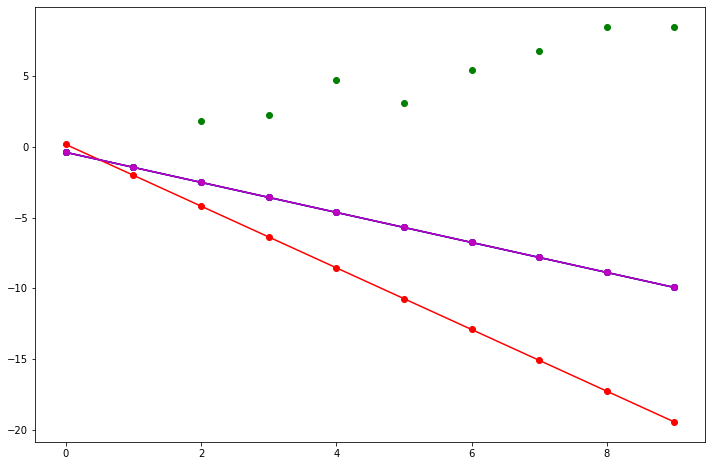

In [63]:
plt.figure(figsize=(12,8))
plt.plot (df['x'],df['y'],'go')
plt.plot (df['x'],df['y"2'],'k-o')
plt.plot (df['x'],df['y"2ridge'],'b-o')
plt.plot (df['x'],df['y"2lasso'],'r-o')
plt.plot (df['x'],df['y"2elastic'],'m-o')


### gambar diatas outputnya terdapat warning karena alpha 0 

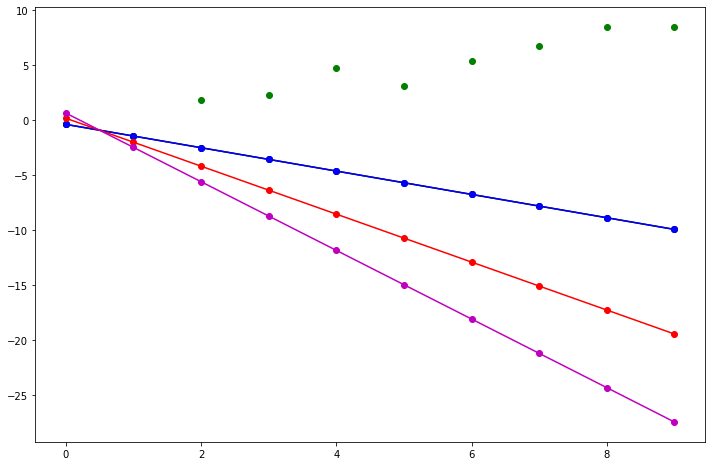

In [64]:
modelE = ElasticNet(alpha=-0.25)  # kalau nilai alpha 0 maka hasilnya akan sama dengan OLS biasa (2 data)

## fitting dengan 2 data pertama

modelE.fit(df[['x']].iloc[:2],df['y'].iloc[:2])

# prediksi dengan 2 data pertama
df['y"2elastic'] = modelE.predict(df[['x']])

plt.figure(figsize=(12,8))
plt.plot (df['x'],df['y'],'go')
plt.plot (df['x'],df['y"2'],'k-o')
plt.plot (df['x'],df['y"2ridge'],'b-o')
plt.plot (df['x'],df['y"2lasso'],'r-o')
plt.plot (df['x'],df['y"2elastic'],'m-o')


## Latihan Soal

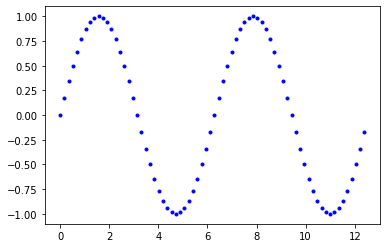

In [65]:
x = np.array ([i* np.pi/180 for i in range (0,720,10)])
y = np.sin(x)

df = pd.DataFrame ({'x' : x, 'y':y})
df.head()
plt.plot(df['x'],df['y'],'b.')


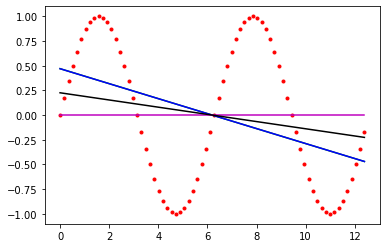

In [67]:
modelA = LinearRegression ()
modelB = Ridge()
modelC = Lasso()
modelD = ElasticNet()

modelA.fit(df[['x']],df['y'])
modelB.fit(df[['x']],df['y'])
modelC.fit(df[['x']],df['y'])
modelD.fit(df[['x']],df['y'])


df['y"A'] = modelA.predict(df[['x']])
df['y"B'] = modelB.predict(df[['x']])
df['y"C'] = modelC.predict(df[['x']])
df['y"D'] = modelD.predict(df[['x']])

plt.plot(df['x'], df['y'], 'r.')
plt.plot(df['x'], df['y"A'], 'g-')
plt.plot(df['x'], df['y"B'], 'b-')
plt.plot(df['x'], df['y"C'], 'm-')
plt.plot(df['x'], df['y"D'], 'k-')

## Data lain untuk POLINOMIAL

In [68]:
x = np.array ([i* np.pi/180 for i in range (0,720,10)])
y = np.sin(x)

df = pd.DataFrame ({'x' : x, 'y':y,'x2' : x**2, 'x3' : x**3})
df.head()


,x,y,x2,x3
0,0.000000,0.000000,0.000000,0.000000
1,0.174533,0.173648,0.030462,0.005317
2,0.349066,0.342020,0.121847,0.042533
3,0.523599,0.500000,0.274156,0.143548
4,0.698132,0.642788,0.487388,0.340261


In [69]:
model = LinearRegression()

model.fit (df[['x','x2','x3']],df['y'])
df['y"'] = model.predict(df[['x','x2','x3']])
df.head()

,x,y,x2,x3,"y"""
0,0.000000,0.000000,0.000000,0.000000,1.073947
1,0.174533,0.173648,0.030462,0.005317,0.955912
2,0.349066,0.342020,0.121847,0.042533,0.845477
3,0.523599,0.500000,0.274156,0.143548,0.742421
4,0.698132,0.642788,0.487388,0.340261,0.646521


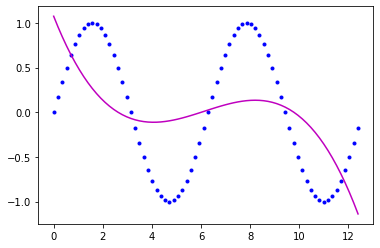

In [70]:
plt.plot (df['x'],df['y'],'b.')
plt.plot (df['x'],df['y"'],'m-')

### Buat DataFrame pake LOOPING jika X banyak

In [71]:
x = np.array ([i* np.pi/180 for i in range (0,720,10)])
y = np.sin(x)

df = pd.DataFrame ({'x' : x, 'y':y})

for i in range (2,11) :
    df[f'x{i}'] = df['x'] ** i
    
df.head()

,x,y,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,0.174533,0.173648,0.030462,0.005317,0.000928,0.000162,0.000028,0.000005,8.610313e-07,1.502783e-07,2.622851e-08
2,0.349066,0.342020,0.121847,0.042533,0.014847,0.005182,0.001809,0.000631,2.204240e-04,7.694250e-05,2.685800e-05
3,0.523599,0.500000,0.274156,0.143548,0.075161,0.039354,0.020606,0.010789,5.649226e-03,2.957928e-03,1.548767e-03
4,0.698132,0.642788,0.487388,0.340261,0.237547,0.165839,0.115777,0.080828,5.642855e-02,3.939456e-02,2.750259e-02


In [72]:
model = LinearRegression()

nilai_x =['x']
nilai_x.extend(['x%d' %i for i in range (2,11)])
model.fit (df[nilai_x],df['y'])
df['y"'] = model.predict(df[nilai_x])
df.head()

,x,y,x2,x3,x4,x5,x6,x7,x8,x9,x10,"y"""
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-0.006864
1,0.174533,0.173648,0.030462,0.005317,0.000928,0.000162,0.000028,0.000005,8.610313e-07,1.502783e-07,2.622851e-08,0.179246
2,0.349066,0.342020,0.121847,0.042533,0.014847,0.005182,0.001809,0.000631,2.204240e-04,7.694250e-05,2.685800e-05,0.348880
3,0.523599,0.500000,0.274156,0.143548,0.075161,0.039354,0.020606,0.010789,5.649226e-03,2.957928e-03,1.548767e-03,0.503434
4,0.698132,0.642788,0.487388,0.340261,0.237547,0.165839,0.115777,0.080828,5.642855e-02,3.939456e-02,2.750259e-02,0.641931


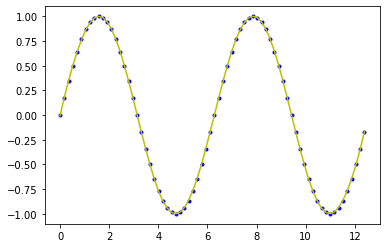

In [73]:
plt.plot (df['x'],df['y'],'b.')
plt.plot (df['x'],df['y"'],'y-')

## Latihan lain

In [ ]:
x = np.arange (1,11)
y = np.exp(x)